In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format="retina"

In [ ]:
N_samples = 500
X = np.linspace(0, 1, N_samples).reshape(-1, 1)
Y = (np.exp(-np.cos(4*np.pi*X))*np.sin(2*np.pi*X))[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=11)
order = np.argsort(X_test, axis=0)[:, 0]
y_test = y_test[order]
X_test = X_test[order]
noise = np.random.randn(*y_train.shape)*0.5
np.random.seed(14)
y_train = y_train + noise

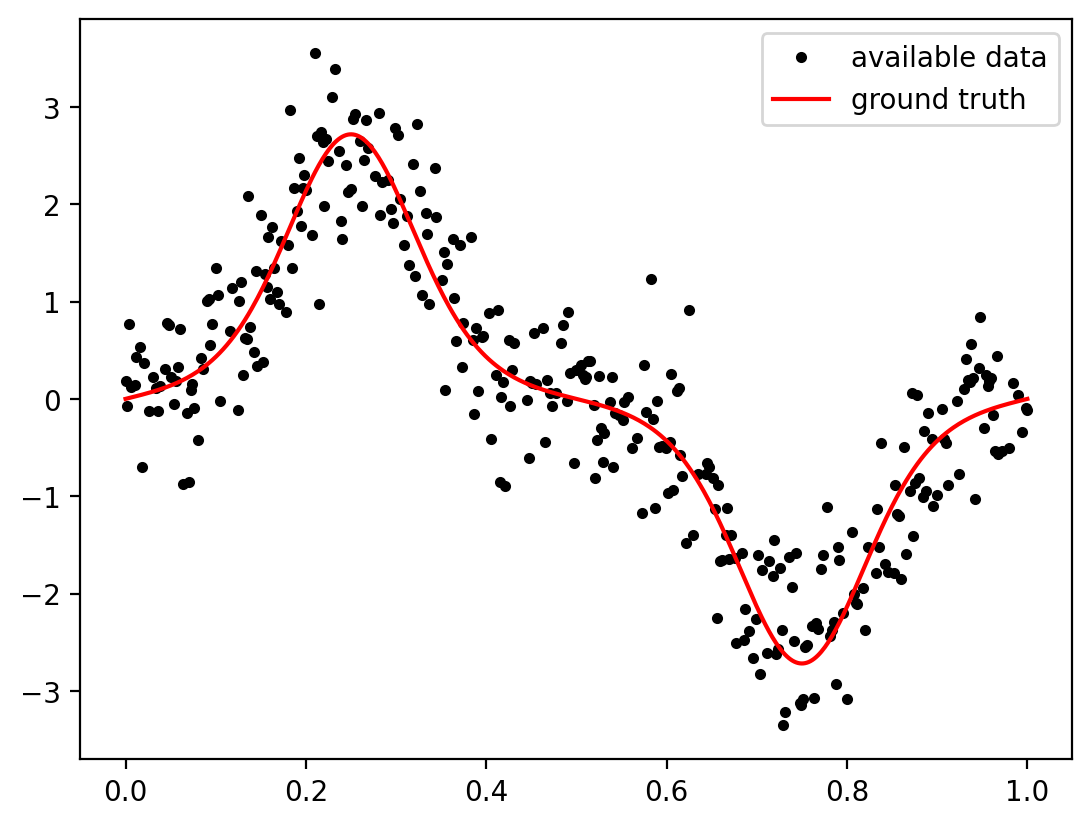

In [ ]:
plt.plot(X_train[:, 0], y_train, '.', color="black", label="available data")
plt.plot(X[:, 0], Y, color="red", label="ground truth")
plt.legend();

In [ ]:
regressor = DecisionTreeRegressor(random_state=0, splitter="random", max_depth=6)

regressor.fit(X_train, y_train)
prediction_single_model = regressor.predict(X_test)

relative_error = np.linalg.norm(prediction_single_model - y_test) / np.linalg.norm(y_test)
print(relative_error)

0.6253511964427858


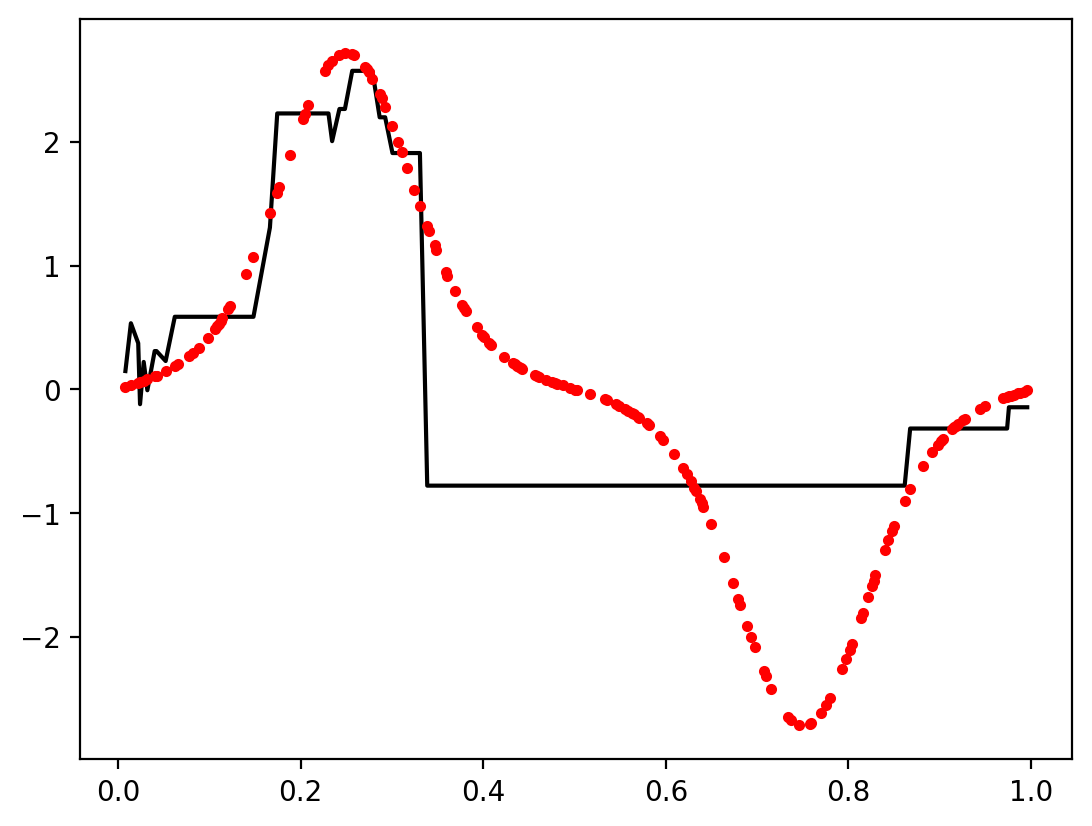

In [ ]:
plt.plot(X_test[:, 0], prediction_single_model, color="black")
plt.plot(X_test[:, 0], y_test, '.', color="red");

In [ ]:
Relative_errors = []
N_models = 1000
p = 0
for i in range(N_models):
    regressor = DecisionTreeRegressor(random_state=23+i, splitter="random", max_depth=4)

    regressor.fit(X_train, y_train)
    prediction = regressor.predict(X_test)

    p += prediction

    prediction = p / (i+1)
    relative_error = np.linalg.norm(prediction - y_test) / np.linalg.norm(y_test)
    Relative_errors.append(relative_error)
print(Relative_errors[-1])

0.29587325892884886


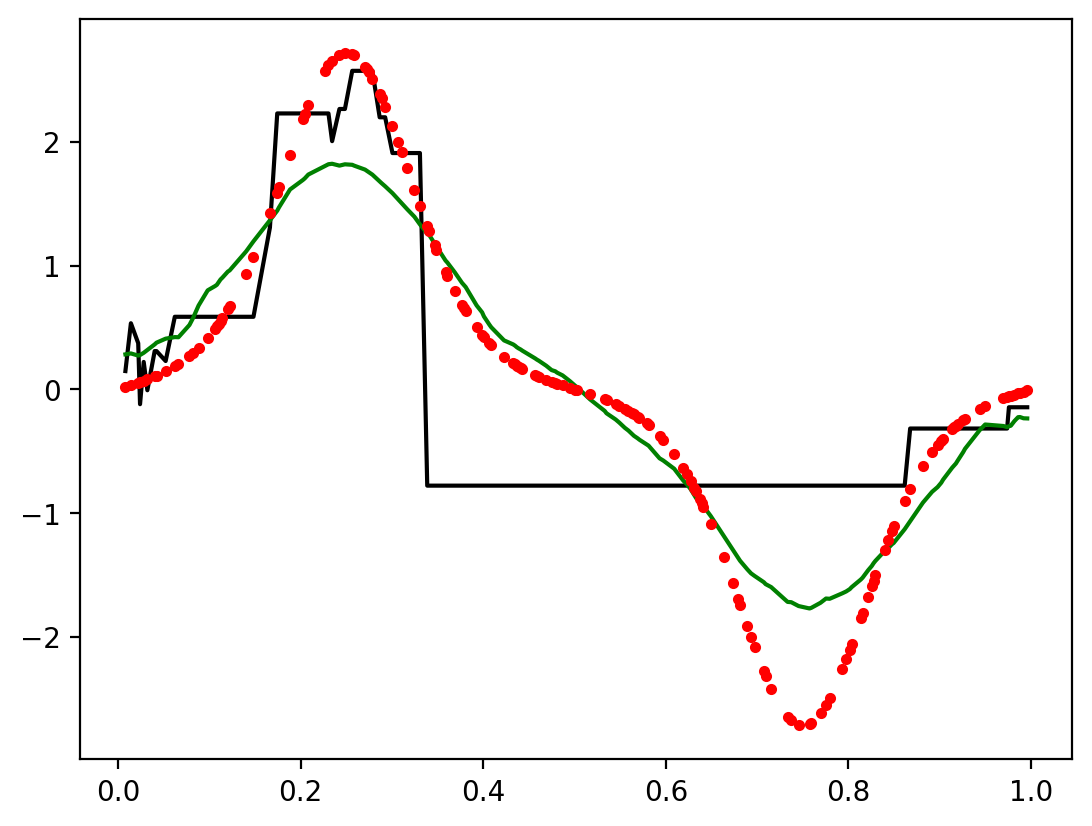

In [ ]:
plt.plot(X_test[:, 0], prediction_single_model, color="black")
plt.plot(X_test[:, 0], prediction, color="green")
plt.plot(X_test[:, 0], y_test, '.', color="red");

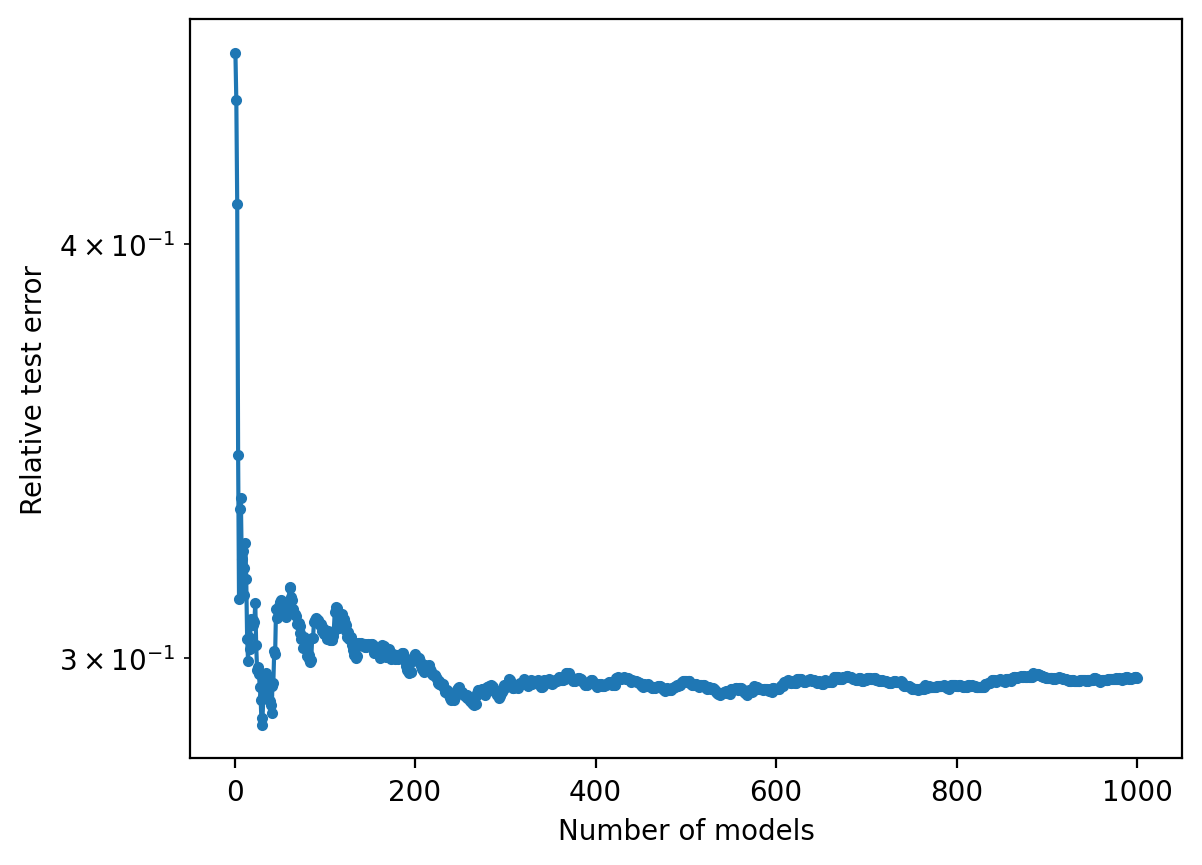

In [ ]:
plt.yscale("log")
plt.plot(np.arange(1, len(Relative_errors)+1), Relative_errors, ".-")
plt.xlabel("Number of models")
plt.ylabel("Relative test error");

In [ ]:
def bootstrap_indices(random_state, n_samples):
    """Return random indices with repetition (bootstrap)."""
    return np.random.RandomState(random_state).randint(low=0,high= n_samples, size=n_samples)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
np.random.choice(np.arange(0, len(X_train)), X_train.shape[0])

array([268, 327, 249, 234, 156, 138, 208,  61, 154,  25,  32, 260, 138,
       138,   0,  84, 133,  37, 120, 101,  41, 232, 231,  67, 207, 324,
       173, 248, 273, 251, 159, 265, 187,  27, 218, 299, 246, 257, 327,
       104, 191,  45, 239,  30,  65,  57,  75, 205, 269, 169, 127, 277,
        13, 323,  61, 330, 238,  92, 238,   9, 334, 178, 144,  52, 257,
       139,  12,  48, 288, 103, 308, 318, 213,  52, 323, 312,  48, 328,
       180,  99,  86, 268,  50,  59, 249,  76, 311, 289, 191,   4, 331,
       184, 123, 284, 294, 101, 156,  65, 207,  34, 256, 155, 299,  67,
        19, 251,  19, 219, 206, 202,  78, 232, 255, 157, 298, 162,  36,
        22,  73,  30,  92, 149, 210,  61,   2, 195,  83, 164, 311, 240,
        36, 181,   9,  19,  28, 324, 195, 109, 241,  89, 122,  37, 240,
        50,  93, 118, 319, 263, 128, 314, 309, 304,  84, 260,  78, 235,
       209, 247, 288, 286, 238, 199, 159,  95, 302, 297, 108,  54,  86,
       126, 129, 221, 313, 177,  48, 266, 333, 291, 283,  89, 15

In [ ]:
Relative_errors = []
N_models = 1000
p = []
pp = 0

for i in range(N_models):
    ix = bootstrap_indices(i+23, X_train.shape[0])
    # ix_features = bootstrap_indices(i+23, X_train.shape[1])
    X_train_ = X_train[ix, :]
    y_train_ = y_train[ix]
    regressor = DecisionTreeRegressor(random_state=i+1,  max_depth=6)

    regressor.fit(X_train_,y_train_)
    prediction = regressor.predict(X_test)

    p.append(prediction )
    pp +=prediction
    prediction = pp / (i+1)
    relative_error = np.linalg.norm(prediction - y_test) / np.linalg.norm(y_test)
    Relative_errors.append(relative_error)
print(Relative_errors[-1])

ValueError: Expected 2D array, got 1D array instead:
array=[0.54108214 0.48897797 0.0501002  0.01603206 0.9799599  0.39478958
 0.36673346 0.73947895 0.7955912  0.26052105 0.31863728 0.90981966
 0.02004008 0.9559118  0.26052105 0.57715434 0.17034069 0.38476953
 0.23246492 0.7675351  0.6873748  0.39478958 0.40480962 0.19038077
 0.71943885 0.53707415 0.2985972  0.11623246 0.48296595 0.03406814
 0.8056112  0.01803607 0.90981966 0.35470942 0.4208417  0.13827655
 0.00200401 0.4729459  0.21042085 0.1523046  0.01603206 0.3507014
 0.7955912  0.4248497  0.4248497  0.87374747 0.01603206 0.9358717
 0.05811623 0.21843687 0.28456914 0.83366734 0.8557114  0.76152307
 0.741483   0.9599198  0.5851703  0.5290581  0.496994   0.7955912
 0.71142286 0.76553106 0.741483   0.21643287 0.7034068  0.4729459
 0.26853707 0.05611223 0.55711424 0.76152307 0.52705413 0.8116233
 0.09619238 0.28056112 0.15831663 0.22044088 0.7034068  0.85370743
 0.93386775 0.33667335 0.9298597  0.6012024  0.58316636 0.1523046
 0.7875751  0.06012024 0.4248497  0.16232465 0.28456914 0.50501
 0.08416834 0.54709417 0.7254509  0.7134268  0.83366734 0.6432866
 0.5230461  0.38476953 0.23647295 0.8557114  0.46492985 0.5511022
 0.13627255 0.13827655 0.8176353  0.15631263 0.71943885 0.69138277
 0.03807615 0.86372745 0.01603206 0.6673347  0.54709417 0.53707415
 0.2765531  0.53707415 0.6032064  0.1783567  0.56713426 0.8076152
 0.21843687 0.1262525  0.2244489  0.62124246 0.9358717  0.1242485
 0.9058116  0.7995992  0.48897797 0.09218437 0.08617234 0.05811623
 0.6873748  0.33667335 0.61723447 0.75551105 0.95791584 0.5290581
 0.26452905 0.7735471  0.9539078  1.         0.31863728 0.83366734
 0.5290581  0.41282564 0.89378756 0.49298596 0.18436874 0.7234469
 0.03807615 0.3266533  0.26853707 0.71142286 0.0761523  0.9058116
 0.2965932  0.5991984  0.14428858 0.22244489 0.252505   0.7274549
 0.08617234 0.7294589  0.7955912  0.751503   0.8577154  0.993988
 0.93386775 0.73947895 0.8076152  0.05410822 0.50901806 0.70541084
 0.89378756 0.3266533  0.6252505  0.5310621  0.7875751  0.5290581
 0.6673347  0.7214429  0.31462926 0.05611223 0.14629258 0.51302606
 0.88977957 0.58717436 0.4488978  0.07214429 0.09619238 0.21242484
 0.4208417  0.96793586 0.51302606 0.06813627 0.17234468 0.7214429
 0.50901806 0.496994   0.61122245 0.6833667  0.9799599  0.51102203
 0.19438878 0.4729459  0.80961925 0.08016032 0.7815631  0.32064128
 0.66533065 0.55711424 0.29058117 0.38476953 0.69539076 0.8657315
 0.90781564 0.46292585 0.19839679 0.03406814 0.17234468 0.46693388
 0.8176353  0.41883767 0.8176353  0.252505   0.93787575 0.9238477
 0.38677356 0.50501    0.51102203 0.09418838 0.16833667 0.6713427
 0.29058117 0.58316636 0.9519038  0.47094187 0.31863728 0.15831663
 0.5310621  0.6693387  0.46292585 0.21242484 0.4529058  0.9799599
 0.6993988  0.33466935 0.24048096 0.21643287 0.2985972  0.8857716
 0.22244489 0.15631263 0.8056112  0.71142286 0.54108214 0.70541084
 0.6472946  0.08416834 0.4308617  0.58717436 0.35270542 0.26653308
 0.19038077 0.3567134  0.29058117 0.17234468 0.8717435  0.78557116
 0.71142286 0.0501002  0.78957915 0.6693387  0.66132265 0.61523044
 0.9218437  0.6432866  0.96392787 0.58316636 0.17234468 0.91182363
 0.36673346 0.0260521  0.14629258 0.1503006  0.78957915 0.6012024
 0.37274548 0.5430862  0.5190381  0.13026053 0.8236473  0.7214429
 0.3046092  0.5290581  0.9218437  0.10420842 0.1262525  0.39478958
 0.05410822 0.23246492 0.8577154  0.6753507  0.64529055 0.7174349
 0.16432866 0.71943885 0.7274549  0.33466935 0.21442886 0.4208417
 0.743487   0.64529055 0.39078155 0.88376755 0.06813627 0.6472946
 0.28456914 0.93787575 0.10220441 0.31262526 0.26052105 0.7715431
 0.51302606 0.01603206 0.28056112 0.80961925 0.9318637  0.47094187
 0.39679357 0.8416834  0.18236473 0.26452905 0.9318637 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

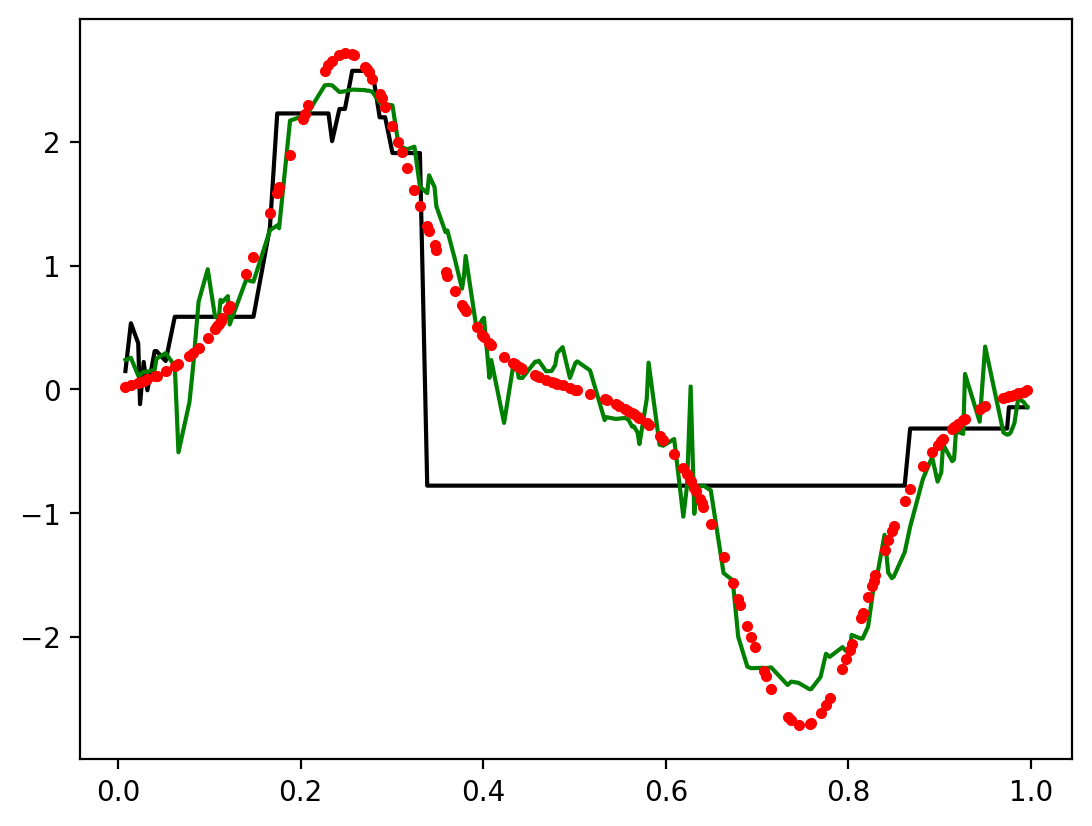

In [ ]:
plt.plot(X_test[:, 0], prediction_single_model, color="black")
plt.plot(X_test[:, 0], np.array(p).mean(axis=0), color="green")
plt.plot(X_test[:, 0], y_test, '.', color="red");

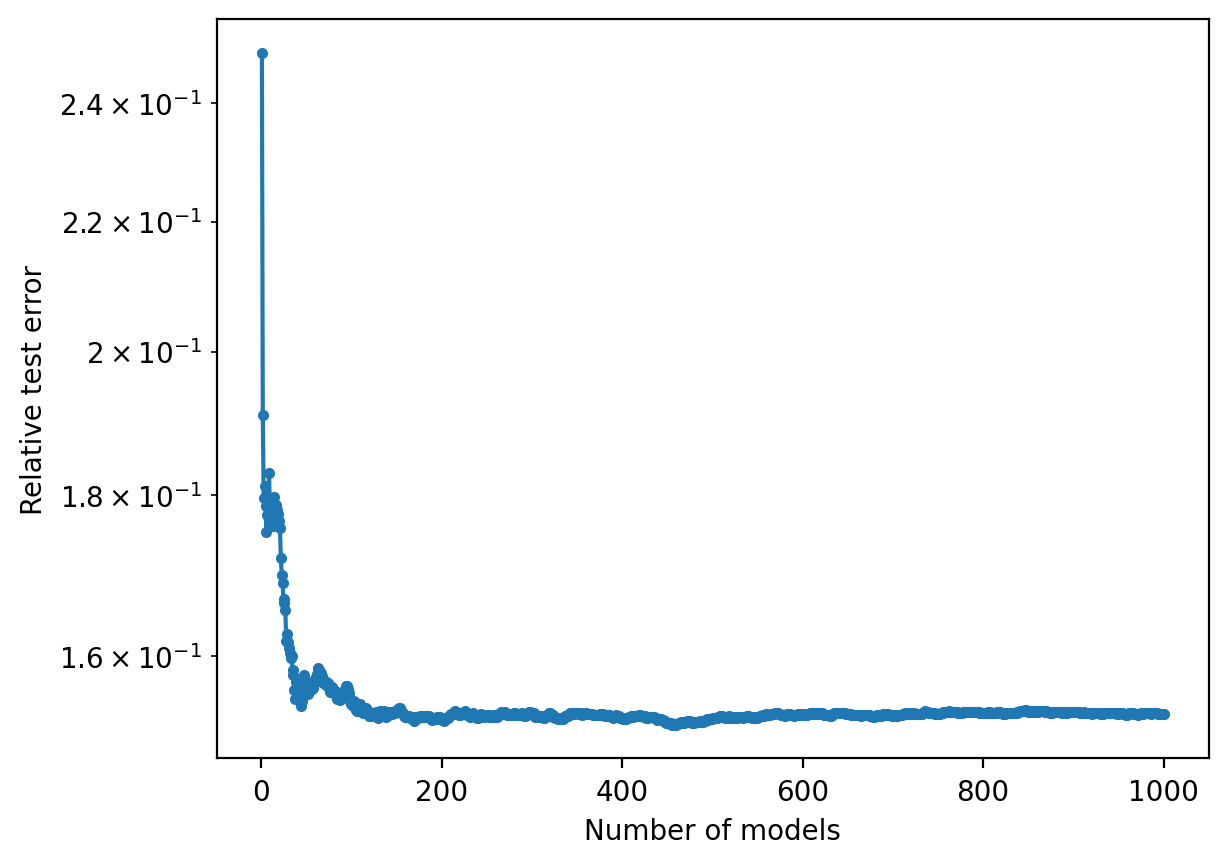

In [ ]:
plt.yscale("log")
plt.plot(np.arange(1, len(Relative_errors)+1), Relative_errors, ".-")
plt.xlabel("Number of models")
plt.ylabel("Relative test error");

# BOOSTING

## Gradient Boosting

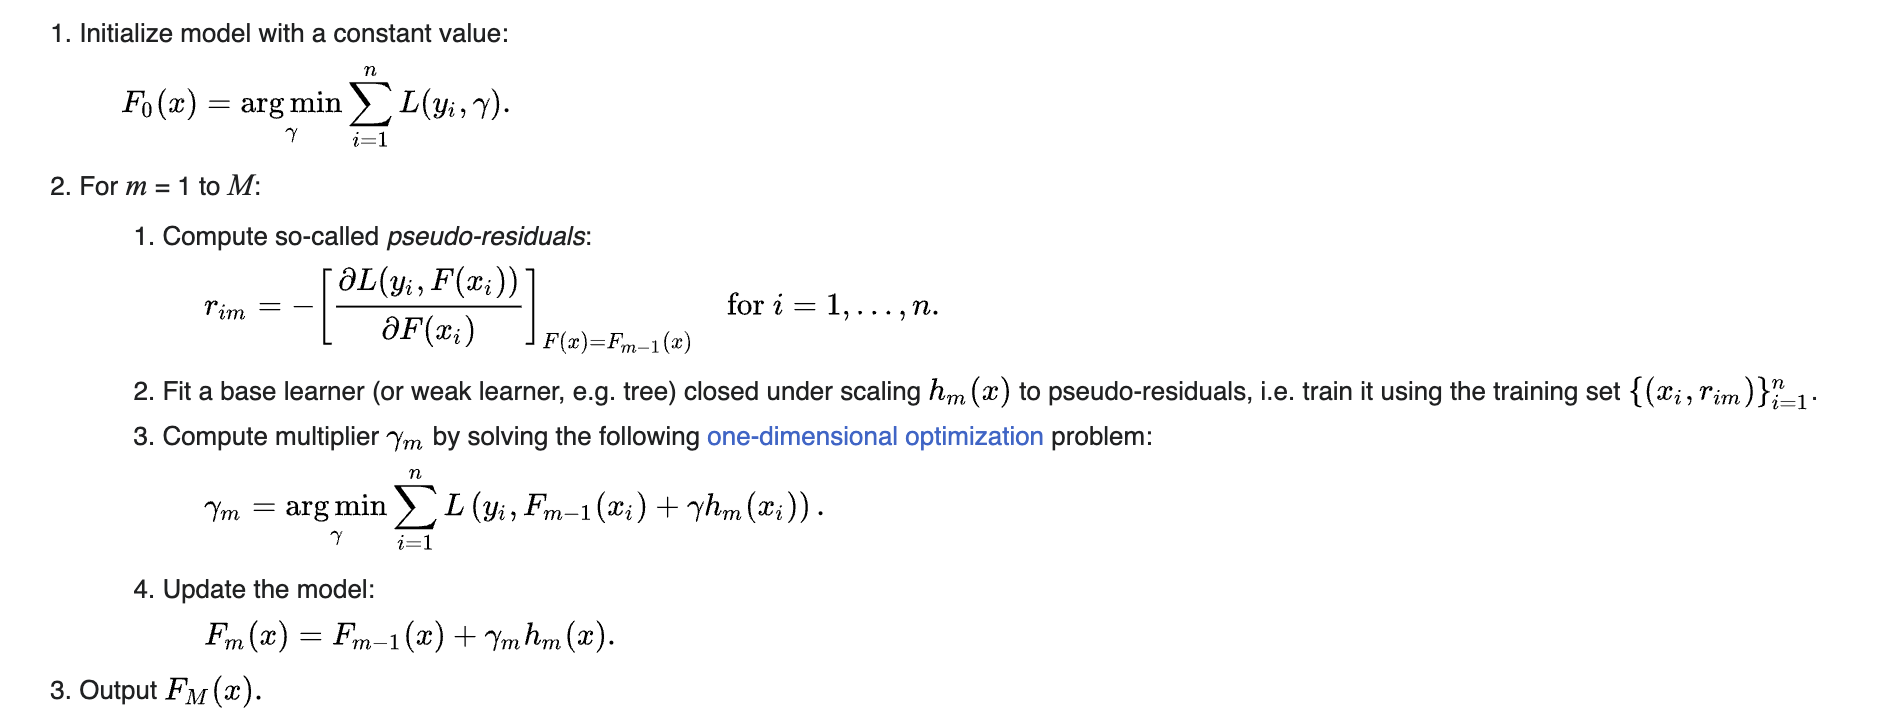

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_preds = clf.predict(X_test)

In [ ]:
print('The ROC-AUC score of the model is:', round(roc_auc_score(y_test, gbc_preds), 4))

The ROC-AUC score of the model is: 0.9697


In [ ]:
from sklearn.datasets import make_moons, make_circles

def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons

    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R

    return X, y


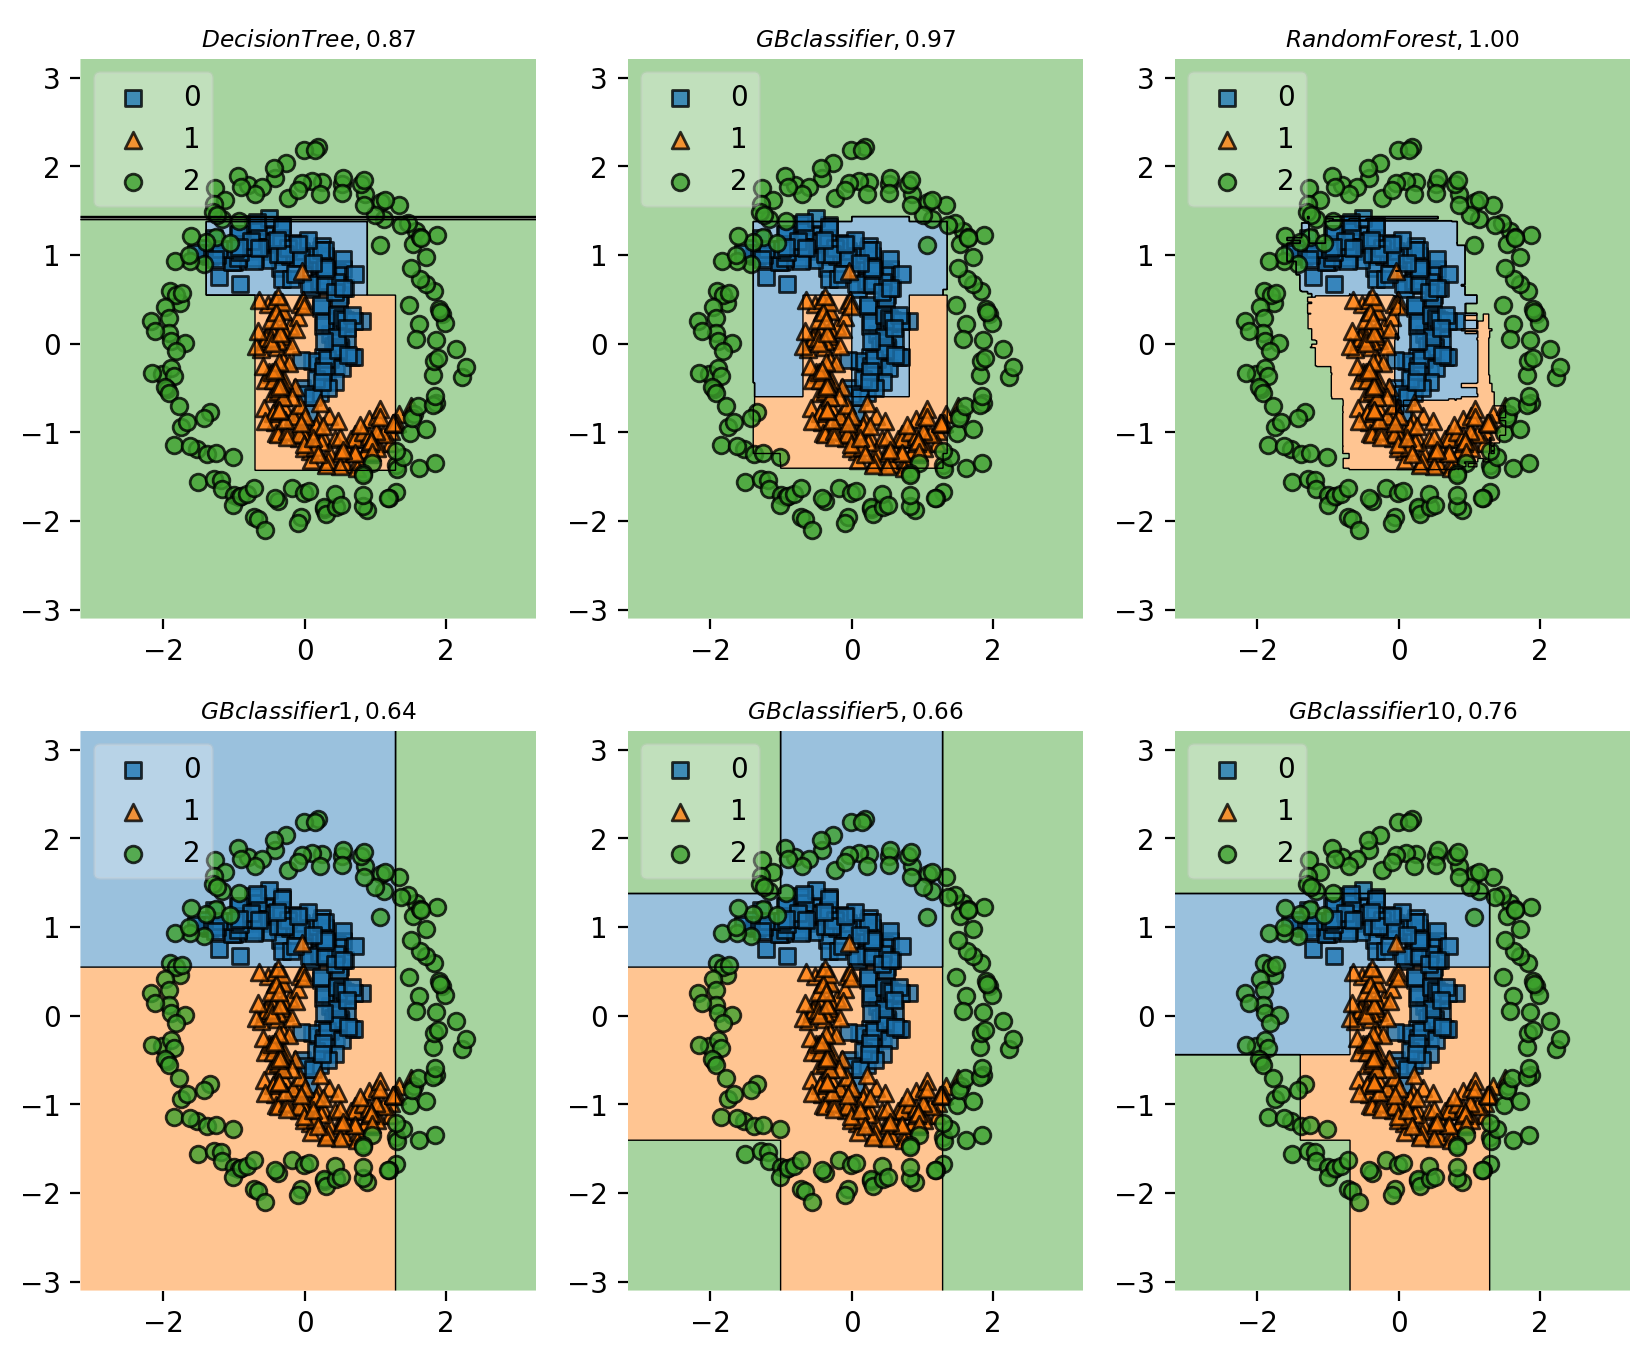

In [ ]:
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

tuples = [(0, 0),(0, 1),(0, 2),(1, 0),(1, 1),(1,2)]

clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
clf1 = GradientBoostingClassifier(max_depth=1)
clf2 = RandomForestClassifier(random_state=1, n_estimators=10)
clf3 = GradientBoostingClassifier(n_estimators = 1, max_depth=1)
clf4 = GradientBoostingClassifier(n_estimators = 5, max_depth=1)
clf5 = GradientBoostingClassifier(n_estimators = 10, max_depth=1)

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['Decision Tree  ','GB classifier  ', 'Random Forest  ', 'GB classifier1  ', 'GB classifier 5 ', 'GB classifier 10  ']
for clf, lab, grd in zip([clf0, clf1, clf2,  clf3, clf4, clf5],
                         labels,
                         tuples):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = accuracy_score(y, clf.predict(X))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title('$_{'+str(lab)+ ', ' + str('{:.2f}'.format(a))+'}$')

plt.show()

In [ ]:
!pip install catboost xgboost

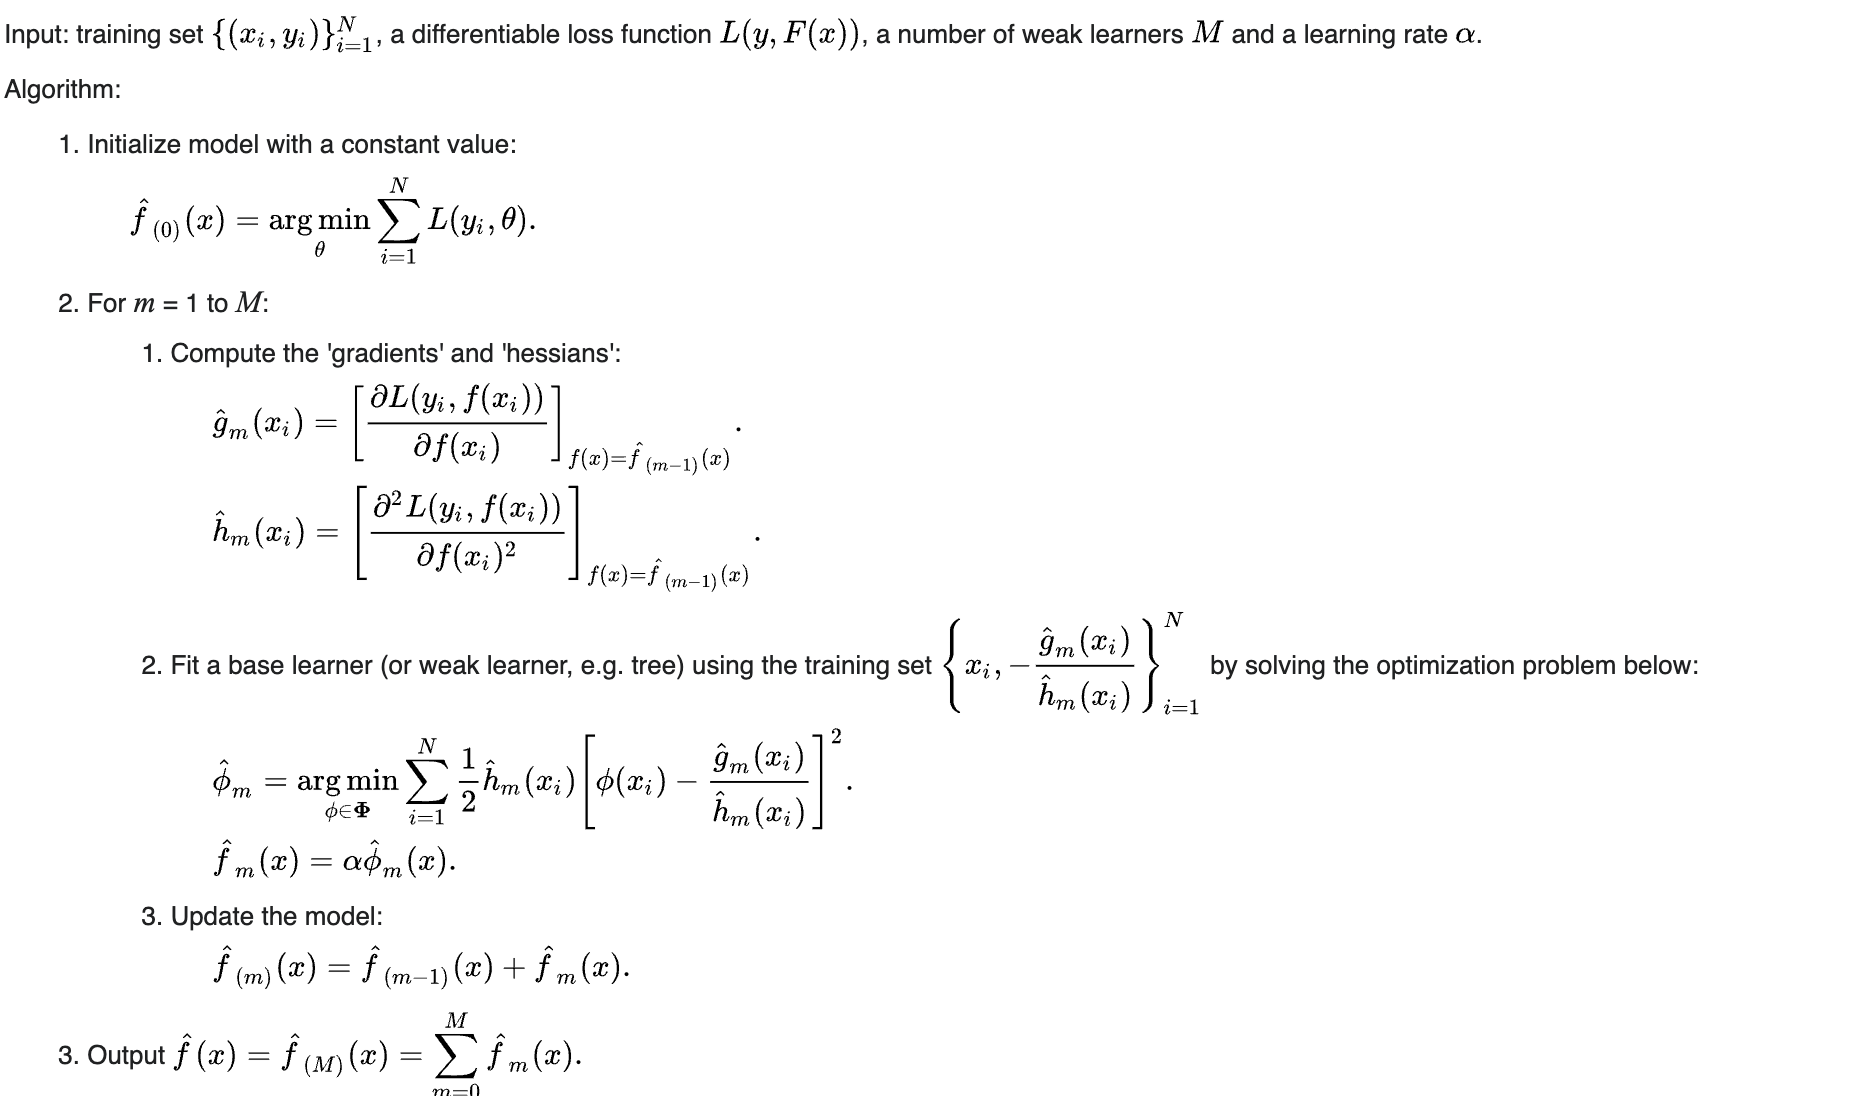

In [ ]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=5, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)
y_pred = bst.predict(X_test)
score = bst.score(X_test, y_test)
print(f'xgboost accuracy is {score * 100:.2f}')

xgboost accuracy is 94.74


In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=3, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
cb.fit(X_train, y_train, plot=True)
preds = cb.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3119495	total: 1.64ms	remaining: 3.28ms
1:	learn: 0.2168512	total: 3.17ms	remaining: 1.58ms
2:	learn: 0.1818232	total: 5.06ms	remaining: 0us


In [ ]:
cb.score(X_test, y_test)

0.9385964912280702

In [ ]:
from catboost import Pool, cv

cv_data = [["France", 1924, 44],
           ["USA", 1932, 37],
           ["Switzerland", 1928, 25],
           ["Norway", 1952, 30],
           ["Japan", 1972, 35],
           ["Mexico", 1968, 112]]

labels = [1, 1, 0, 0, 0, 1]

cat_features = [0]

cv_dataset = Pool(data=cv_data,
                  label=labels,
                  cat_features=cat_features)

params = {"iterations": 100,
          "depth": 2,
          "loss_function": "Logloss",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=2,
            plot="True")


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/2]

bestTest = 0.5738373179
bestIteration = 84

Training on fold [1/2]

bestTest = 0.693188484
bestIteration = 0

